# Exchange Rate vs. Inflation Analysis

This script reads in CSV files containing exchange rate and inflation data, and merges the dataframes. It then generates line plots, correlation and r-values, and scatter plots with linear regression to visualize these values over time for each currency/country in our dataset.  A PNG file of each chart is save in the Output directory.

In [1]:
# set environment
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import numpy as np

import scipy.stats as st
from scipy.stats import linregress 
import requests
import warnings

# pull in constants from config file
from config import xchg_filename
from config import infl_filename
from config import base_country
from config import countries

# turn off warning notifications
warnings.filterwarnings("ignore")


# define years to plot
years = ["2014", "2015", "2016", "2017", "2018", "2019"]

In [2]:
# get currency code we compared all rates to
base_currency = base_country["currency_code"]

In [3]:
# read in exchange rate data and display the dataframe
exchange_data = pd.read_csv(xchg_filename)
exchange_data

,Country,Currency Code,Currency,Date,Close Rate
0,Australia,AUD,Australian Dollar,2014-12,0.8165
1,Australia,AUD,Australian Dollar,2015-01,0.7768
2,Australia,AUD,Australian Dollar,2015-02,0.7806
3,Australia,AUD,Australian Dollar,2015-03,0.7620
4,Australia,AUD,Australian Dollar,2015-04,0.7898
...,...,...,...,...,...
849,Turkey,TRY,Turkish Lira,2019-08,0.1710
850,Turkey,TRY,Turkish Lira,2019-09,0.1765
851,Turkey,TRY,Turkish Lira,2019-10,0.1747
852,Turkey,TRY,Turkish Lira,2019-11,0.1735


In [4]:
# read in inflation data and display the dataframe
inflation_data = pd.read_csv(infl_filename)

In [5]:
# merge dataframes matching country, currency, currency code and date
analysis_data = pd.merge(exchange_data, inflation_data, on=["Country", "Currency", "Currency Code", "Date"], how="outer")
analysis_data

,Country,Currency Code,Currency,Date,Close Rate,Inflation Rate
0,Australia,AUD,Australian Dollar,2014-12,0.8165,NaN
1,Australia,AUD,Australian Dollar,2015-01,0.7768,NaN
2,Australia,AUD,Australian Dollar,2015-02,0.7806,NaN
3,Australia,AUD,Australian Dollar,2015-03,0.7620,NaN
4,Australia,AUD,Australian Dollar,2015-04,0.7898,NaN
...,...,...,...,...,...,...
1153,Ukraine,UAH,Ukrainian Hryvnia,2019-08,NaN,4.05
1154,Ukraine,UAH,Ukrainian Hryvnia,2019-09,NaN,4.05
1155,Ukraine,UAH,Ukrainian Hryvnia,2019-10,NaN,4.05
1156,Ukraine,UAH,Ukrainian Hryvnia,2019-11,NaN,4.05


In [6]:
# drop any rows with null data
analysis_data.dropna(how="any", inplace=True)
analysis_data

,Country,Currency Code,Currency,Date,Close Rate,Inflation Rate
61,Brazil,BRL,Brazilian Real,2014-12,0.3757,6.41
62,Brazil,BRL,Brazilian Real,2015-01,0.3712,10.67
63,Brazil,BRL,Brazilian Real,2015-02,0.3516,10.67
64,Brazil,BRL,Brazilian Real,2015-03,0.3123,10.67
65,Brazil,BRL,Brazilian Real,2015-04,0.3310,10.67
...,...,...,...,...,...,...
849,Turkey,TRY,Turkish Lira,2019-08,0.1710,1.06
850,Turkey,TRY,Turkish Lira,2019-09,0.1765,1.06
851,Turkey,TRY,Turkish Lira,2019-10,0.1747,1.06
852,Turkey,TRY,Turkish Lira,2019-11,0.1735,1.06


In [7]:
# we now have a clean dataset
# pull a list of unique currency codes from the resultant dataset
curr_codes = analysis_data["Currency Code"].unique()

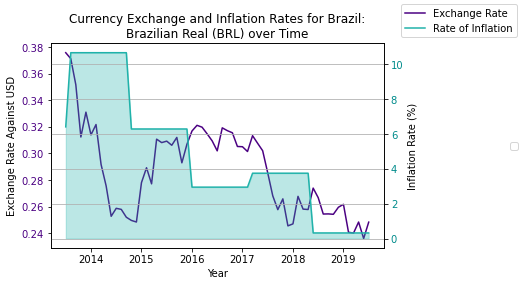


The r-value is: 0.35948589150446697
The correlation between Exchange Rate and Inflation Rate is 0.36


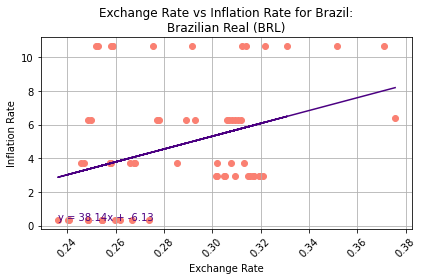

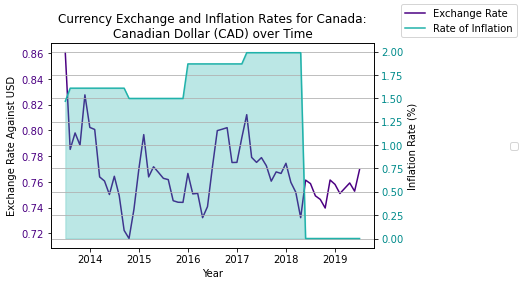


The r-value is: 0.23712101748490538
The correlation between Exchange Rate and Inflation Rate is 0.24


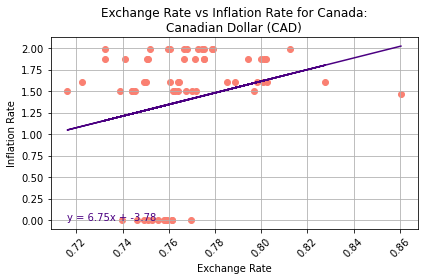

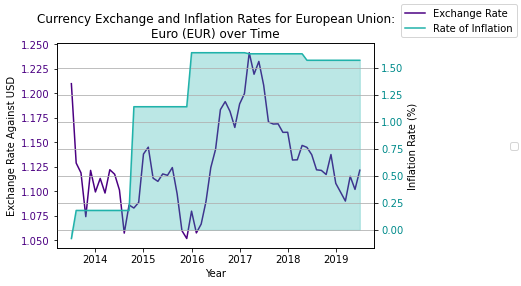


The r-value is: 0.31581837190416584
The correlation between Exchange Rate and Inflation Rate is 0.32


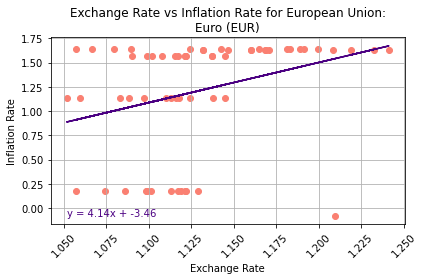

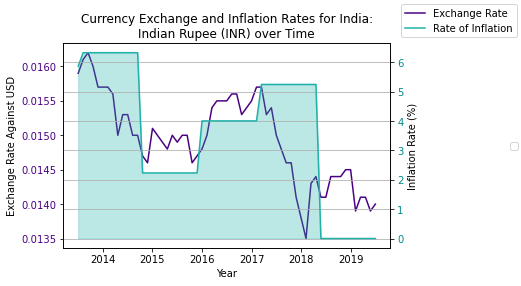


The r-value is: 0.5973152865984126
The correlation between Exchange Rate and Inflation Rate is 0.6


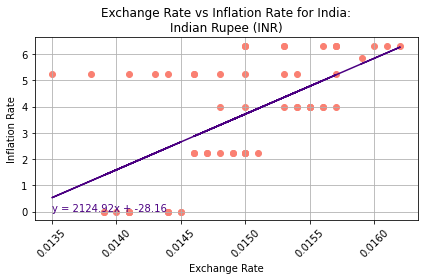

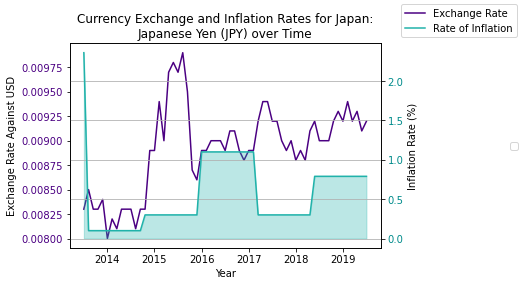


The r-value is: 0.17864091338576482
The correlation between Exchange Rate and Inflation Rate is 0.18


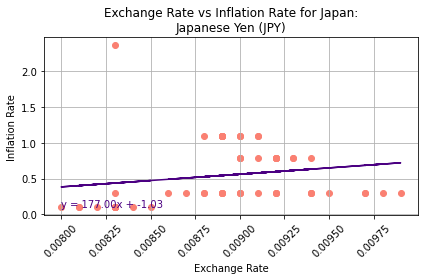

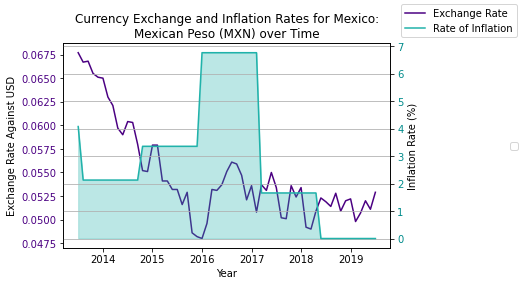


The r-value is: 0.0032802464516571966
The correlation between Exchange Rate and Inflation Rate is 0.0


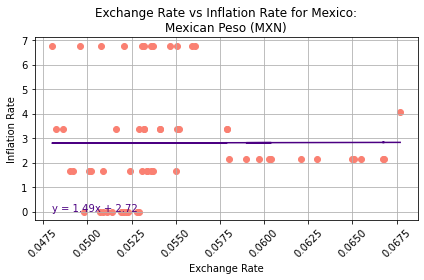

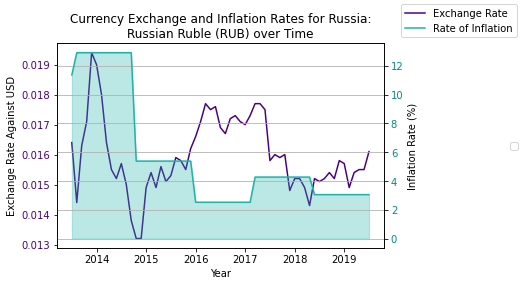


The r-value is: 0.030043129430092505
The correlation between Exchange Rate and Inflation Rate is 0.03


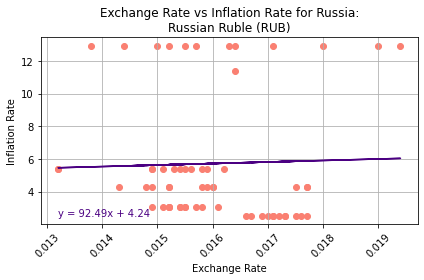

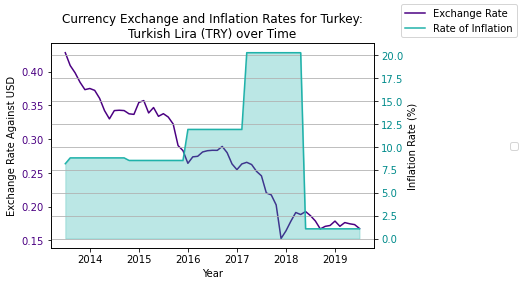


The r-value is: 0.009670591919641647
The correlation between Exchange Rate and Inflation Rate is 0.01


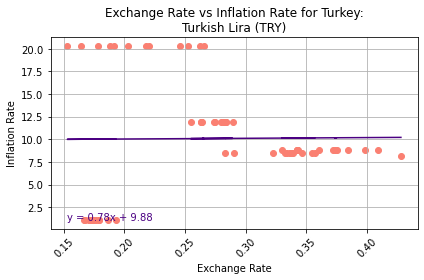

In [11]:
# loop through each unique currency code
for curr_code in curr_codes:

    ###########
    ########### GENERATE LINE PLOT WITH MULTIPLE GRAPHS
    ###########
    
    # pull x and y currency exchange values for chart
    date_data = analysis_data.loc[analysis_data["Currency Code"] == curr_code]["Date"]
    xc_rate_data = analysis_data.loc[analysis_data["Currency Code"] == curr_code]["Close Rate"].astype(float)
    in_rate_data = analysis_data.loc[analysis_data["Currency Code"] == curr_code]["Inflation Rate"].astype(float)
    
    # grab the country name and currency from either table
    country = inflation_data.loc[inflation_data["Currency Code"] == curr_code]["Country"].values[0]
    currency = inflation_data.loc[inflation_data["Currency Code"] == curr_code]["Currency"].values[0]
    
    # tell matplotlib we want different scales on one chart
    fig, exch_line = plt.subplots()
    

    # plot exchange rate data
    exch_line.plot(date_data, xc_rate_data, color="indigo", label="Exchange Rate")
    exch_line.tick_params(axis='y', labelcolor = 'indigo')


    # force the location of the xticks -- monthly ticks are too many to read on the x axis.
    # label with the year, instead
    x_formatter = FixedFormatter(years)
    x_locator = FixedLocator([5, 15, 25, 35, 45, 55])

    exch_line.xaxis.set_major_formatter(x_formatter)
    exch_line.xaxis.set_major_locator(x_locator)

    # instantiate a second y-axis
    infl_line = exch_line.twinx()
    
 
    # plot inflation data
    infl_line.plot(date_data, in_rate_data, color="lightseagreen", label="Rate of Inflation" )
    infl_line.tick_params(axis='y', labelcolor='darkcyan')
    plt.fill_between(date_data, in_rate_data, color="lightseagreen", alpha=0.3)

    # have to format the tick for the second set of datapoints,
    # or we will overwrite with monthly ticks
    infl_line.xaxis.set_major_formatter(x_formatter)
    infl_line.xaxis.set_major_locator(x_locator)
    
    # format a title and axis labels for our chart
    exch_line.set_title(f"Currency Exchange and Inflation Rates for {country}:\n{currency} ({curr_code}) over Time")
    exch_line.set_xlabel("Year")
    exch_line.set_ylabel(f"Exchange Rate Against {base_currency}")
    infl_line.set_ylabel("Inflation Rate (%)", rotation="vertical")
    
    # create a legend for our chart
    fig.legend(handles=[exch_line, infl_line], bbox_to_anchor=(1.2, 0.5), borderaxespad=0)
    fig.legend(loc="best")

    # add a grid for looks
    plt.grid()
    
    # save a copy of the graph
    fig.tight_layout()
    plt.savefig(f"Output/XRvsInflLineGraph_{curr_code}.png")
    
    # Show the chart
    plt.show()
    
    ################
    ################ GENERATE SCATTER PLOT
    ################

    # calculate the correlation value
    correlation = st.pearsonr(xc_rate_data, in_rate_data)
    
    # create a scatter plot of exchange rate vs. inflation rate
    plt.scatter(xc_rate_data ,in_rate_data, facecolor="salmon")
    plt.title(f"Exchange Rate vs Inflation Rate for {country}:\n{currency} ({curr_code})")
    plt.xlabel('Exchange Rate')
    plt.ylabel('Inflation Rate')
    
    # calculate the linear regression
    reg = linregress(xc_rate_data, in_rate_data)


    # calculate the y values for our line, and format the equation
    # for the plot
    y_values = xc_rate_data * reg.slope + reg.intercept
    line_eq = f"y = {reg.slope:.2f}x + {reg.intercept:.2f}"
    plt.plot(xc_rate_data, y_values, color="indigo")
    plt.annotate(line_eq, (min(xc_rate_data),min(in_rate_data)), fontsize=10, color="indigo")
    plt.xticks(rotation=45)
        
    # display the r-value and the correlation
    print(f"\nThe r-value is: {reg.rvalue}")                 
    print(f"The correlation between Exchange Rate and Inflation Rate is {round(correlation[0],2)}")
    
    # add a grid and save a copy of the chart
    plt.grid()
    plt.tight_layout()
    plt.savefig(f"Output/XRvsInflRegress_{curr_code}.png")
    plt.show()